# Homework 6

## Problem 3

Consider the following IVP: 
$$
\left\{
\begin{array}{ll}
u_t = 0.25^2 u_{xx} , & x\in \mathbb{R}, t\in (0,+\infty)\\[6pt]
u(x,0) = \frac{1}{1+x^2}, & x\in \mathbb{R}
\end{array}
\right.
$$

When $x \to \infty$, $\phi(x) = \frac{1}{1+x^2} \to 0$. Given this fact one can take sufficiently large $x$, so that the boundary conditions will be close to $0$. Consider the numerical solution of the IVP on the interval $x \in [-100, 100]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha = 0.25
l = 100 
T = 10 

n = 20 
m = 10000 

x = -100 + l * np.arange(2*n+1)/n
t = T * np.arange(m+1)/m
dx = l/n
dt = T/m

Check that stability condition $\alpha^2\frac{\Delta t}{{\Delta x}^2} \leq \frac{1}{2}$ is satisfied:

In [3]:
s = alpha**2 * dt/(dx)**2 
s < 0.5

True

In [4]:
def left(t):
    return 0

def right(t):
    return 0

def initial(x):
    return 1/(1+x**2)

In [5]:
u = np.zeros((2*n+1, m+1))

In [6]:
u[0,:] = left(t)
u[n,:] = right(t)
u[:,0] = initial(x)

Now the Update Scheme for the IBVP is:
$$
\frac{u_{i,j+1}-u_{i,j}}{\Delta t} = \alpha^2 \frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{(\Delta x) ^2}
$$

where $j = 1, \dotsc, m$ and $i = 1, \dotsc, 2n-1$

In [7]:
for j in range(m):
    for i in range(1,2*n):
        u[i,j+1] = u[i,j] + alpha**2 * (dt/(dx)**2) * (u[i+1,j]-2*u[i,j]+u[i-1,j])

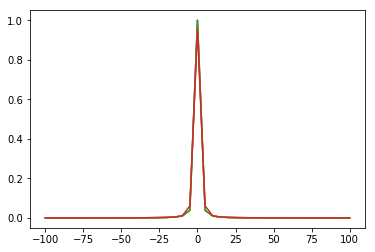

In [8]:
plt.plot(x, u[:,0], x, u[:,1], x, u[:,3], x, u[:,m])
plt.show()